In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Uber.csv")

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [7]:
# calculate total missing values in each column
df.isnull().sum().sort_values(ascending=False) 

PURPOSE*       503
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
START_DATE*      0
MILES*           0
dtype: int64

In [8]:
# the purpose riders take rides
df["PURPOSE*"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [9]:
# find out the most reason (purpose) of people that ride
df["PURPOSE*"].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [10]:
# data cleaning
# replacing nan with unknown
df["PURPOSE*"] = df["PURPOSE*"].fillna("unknown")
df["PURPOSE*"].value_counts()

PURPOSE*
unknown            503
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [11]:
df.isnull().sum()

START_DATE*    0
END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
MILES*         0
PURPOSE*       0
dtype: int64

In [12]:
#dropping the remaining values
len(df)

1156

In [13]:
#dropping the remaining values
df = df.dropna()
len(df)

1155

In [44]:
#dropping the remaining values
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [14]:
#rename 
df = df.rename(columns = {'START_DATE*':'Start_date', 
               'END_DATE*':'End_date',
               'CATEGORY*':'Category',
               'START*':'Start', 
               'STOP*':'Stop',
               'MILES*':'Miles',
               'PURPOSE*':'Purpose'}
              )

In [15]:
df.head()

,Start_date,End_date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,unknown
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [18]:
# data preprocessing 
import datetime as dt
df['Start_date'] = pd.to_datetime(df['Start_date'])
df['End_date']  = pd.to_datetime(df['End_date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_date  1155 non-null   datetime64[ns]
 1   End_date    1155 non-null   datetime64[ns]
 2   Category    1155 non-null   object        
 3   Start       1155 non-null   object        
 4   Stop        1155 non-null   object        
 5   Miles       1155 non-null   float64       
 6   Purpose     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [19]:
df["day name"] = df.Start_date.dt.day_name()
df["day"] = df.Start_date.dt.day
df["month name"] = df.Start_date.dt.month_name()
df["month"] = df.Start_date.dt.month
df["hour"] = df.Start_date.dt.hour
df["year"] = df.Start_date.dt.year

In [20]:
df.head()

,Start_date,End_date,Category,Start,Stop,Miles,Purpose,day name,day,month name,month,hour,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,1,January,1,21,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,Saturday,2,January,1,1,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,2,January,1,20,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,5,January,1,17,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,6,January,1,14,2016


In [30]:
# duration of each ride
df["duration"] = (df["End_date"] - df["Start_date"]).astype("timedelta64[ns]")
df.head()

,Start_date,End_date,Category,Start,Stop,Miles,Purpose,day name,day,month name,month,hour,year,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,1,January,1,21,2016,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,Saturday,2,January,1,1,2016,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,2,January,1,20,2016,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,5,January,1,17,2016,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,6,January,1,14,2016,0 days 01:07:00


In [31]:
df["duration"] = (df["End_date"] - df["Start_date"]).astype("timedelta64[ns]")
df["duration"] = df["duration"].dt.total_seconds()/60
df.head()

,Start_date,End_date,Category,Start,Stop,Miles,Purpose,day name,day,month name,month,hour,year,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,1,January,1,21,2016,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,Saturday,2,January,1,1,2016,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,2,January,1,20,2016,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,5,January,1,17,2016,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,6,January,1,14,2016,67.0


In [32]:
# checking for outliers
df.describe()

,Start_date,End_date,Miles,day,month,hour,year,duration
count,1155,1155,1155.000000,1155.000000,1155.000000,1155.000000,1155.0,1155.000000
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,10.566840,16.309091,6.982684,14.696104,2016.0,23.243290
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,1.000000,1.000000,0.000000,2016.0,0.000000
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,2.900000,9.000000,3.500000,12.000000,2016.0,10.000000
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,6.000000,17.000000,7.000000,15.000000,2016.0,16.000000
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,10.400000,24.000000,10.000000,18.000000,2016.0,27.500000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,31.000000,12.000000,23.000000,2016.0,336.000000
std,NaN,NaN,21.579106,8.713157,3.544915,4.575226,0.0,27.318277


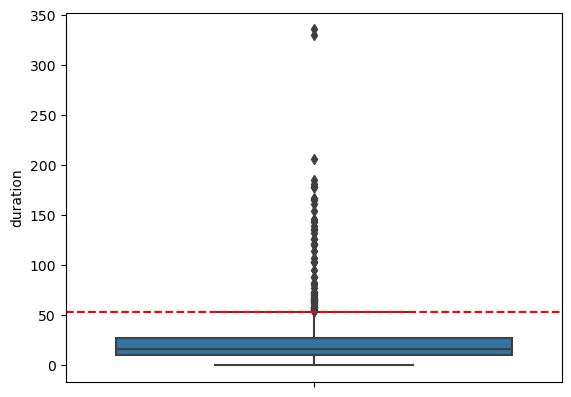

In [35]:
# checking for outliers
sns.boxplot(df, y ="duration")
plt.axhline(y=53, color="r", linestyle="--")

In [36]:
# removing outliers
df = df[df["duration"] < 53]
df.head()

,Start_date,End_date,Category,Start,Stop,Miles,Purpose,day name,day,month name,month,hour,year,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,1,January,1,21,2016,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,Saturday,2,January,1,1,2016,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,2,January,1,20,2016,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,5,January,1,17,2016,14.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,6,January,1,17,2016,4.0


In [38]:
# top category ride
df["Category"].unique()

array(['Business', 'Personal'], dtype=object)

In [39]:
df["Category"].value_counts()

Category
Business    1012
Personal      71
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

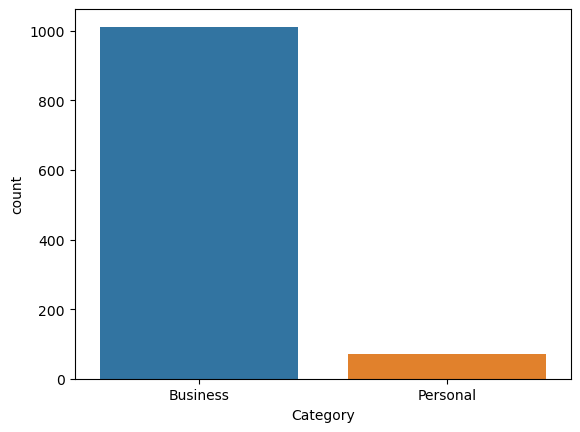

In [42]:
# visualize rides based on category
sns.countplot(df, x="Category")

<Axes: xlabel='Purpose', ylabel='count'>

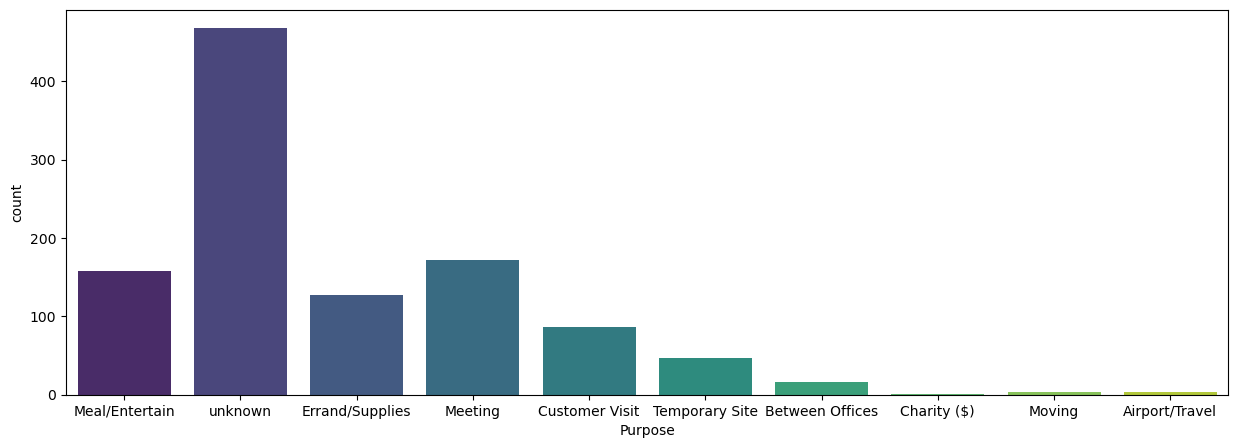

In [44]:
# visualize rides based on purpose
plt.figure(figsize=(15,5))
sns.countplot(df, x="Purpose", palette="viridis")

<Axes: xlabel='month name', ylabel='duration'>

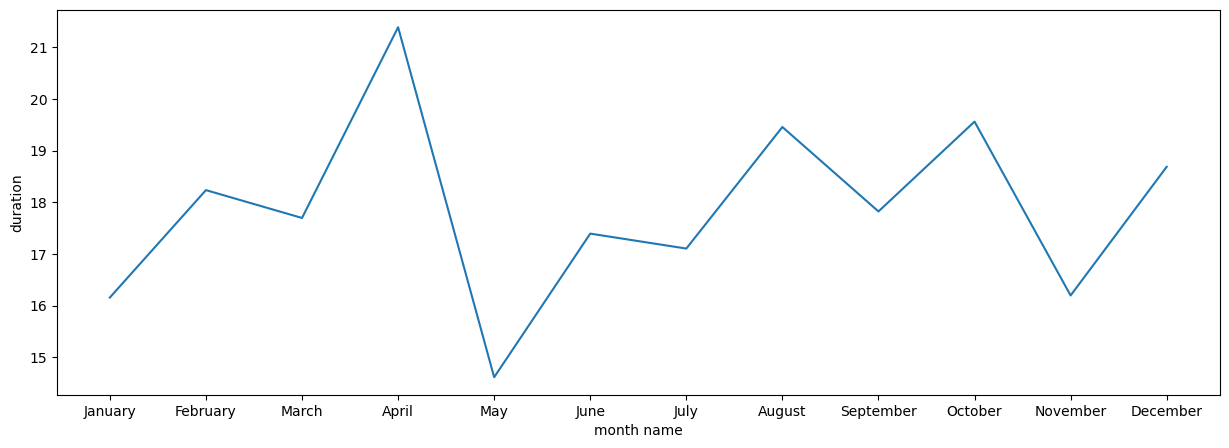

In [47]:
# duration over the months
plt.figure(figsize=(15,5))
sns.lineplot(df, x="month name", y="duration", ci=None)